# BUILT Models

In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import joblib
from data_preprocessing import *

## Unificazione dati OMI per il comune di Verona (2023-2024)


### üìå PASSO 1: Caricare i file CSV
6 file: 3 file "valori" e 3 file "zone", uno per ciascun semestre.

‚úÖ Obiettivo: Scrivere una funzione per caricare i file in un DataFrame, gestendo la rimozione della prima riga di intestazione

Sto organizzando i dati di Verona suddivisi per semestre (2023 e 2024). Ogni file contiene informazioni sui prezzi immobiliari e sulla suddivisione delle zone.

In [ ]:
# Caricamento di tutti i file
df_valori_list = [carica_csv(files_valori[sem], sem) for sem in files_valori]
df_zone_list = [carica_csv(files_zone[sem], sem) for sem in files_zone]

# Creiamo due DataFrame unificati
df_valori = pd.concat(df_valori_list, ignore_index=True)
df_zone = pd.concat(df_zone_list, ignore_index=True)

# Verifichiamo i dati caricati
print("\n Prime righe del dataset VALORI:\n", df_valori.head())
print("\n Prime righe del dataset ZONE:\n", df_zone.head())


 Prime righe del dataset VALORI:
   area_territoriale regione prov  comune_istat comune_cat sez comune_amm  \
0          NORD-EST  VENETO   VR       5023091       D6AA           L781   
1          NORD-EST  VENETO   VR       5023091       D6AA           L781   
2          NORD-EST  VENETO   VR       5023091       D6AA           L781   
3          NORD-EST  VENETO   VR       5023091       D6AA           L781   
4          NORD-EST  VENETO   VR       5023091       D6AA           L781   

  comune_descrizione fascia zona  ...               descr_tipologia    stato  \
0             VERONA      B   B2  ...             Abitazioni civili  NORMALE   
1             VERONA      B   B2  ...             Abitazioni civili   OTTIMO   
2             VERONA      B   B2  ...  Abitazioni di tipo economico  NORMALE   
3             VERONA      B   B2  ...                        Negozi  NORMALE   
4             VERONA      B   B2  ...                        Uffici  NORMALE   

  stato_prev compr_min comp

- I dati "valori" contengono informazioni sulle quotazioni immobiliari, cio√® prezzi di compravendita e locazione.
- I dati "zone" contengono informazioni geografiche sulle zone OMI e le tipologie di immobili predominanti.

### üìå PASSO 2: Pulizia dei Dati
‚úÖ Obiettivo: Creare una funzione per pulire i dati

In [6]:
# Pulizia del dataset VALORI
df_valori_pulito = pulisci_dati(df_valori)

# Pulizia del dataset ZONE
df_zone_pulito = pulisci_dati(df_zone)

# Controllo dei dati dopo la pulizia
print("\n Controllo valori mancanti dopo la pulizia (VALORI):\n", df_valori_pulito.isnull().sum())
print("\n Controllo valori mancanti dopo la pulizia (ZONE):\n", df_zone_pulito.isnull().sum())

# Controllo dei tipi di dati dopo la conversione
print("\n Tipi di dati dopo la conversione (VALORI):\n", df_valori_pulito.dtypes)
print("\n Tipi di dati dopo la conversione (ZONE):\n", df_zone_pulito.dtypes)



 Controllo valori mancanti dopo la pulizia (VALORI):
 area_territoriale     0
regione               0
prov                  0
comune_istat          0
comune_cat            0
sez                   0
comune_amm            0
comune_descrizione    0
fascia                0
zona                  0
linkzona              0
cod_tip               0
descr_tipologia       0
stato                 0
stato_prev            0
compr_min             0
compr_max             0
sup_nl_compr          0
loc_min               0
loc_max               0
sup_nl_loc            0
semestre              0
dtype: int64

 Controllo valori mancanti dopo la pulizia (ZONE):
 area_territoriale     0
regione               0
prov                  0
comune_istat          0
comune_cat            0
sez                   0
comune_amm            0
comune_descrizione    0
fascia                0
zona_descr            0
zona                  0
linkzona              0
cod_tip_prev          0
descr_tip_prev        0
stato_prev     

C:\Users\emmal\AppData\Local\Temp\ipykernel_16320\1959722814.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Imputazione con mediana per numeri
C:\Users\emmal\AppData\Local\Temp\ipykernel_16320\1959722814.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

Sono stati ripuliti i dati correggendo i numeri e riempendo eventuali valori mancanti in modo da evitare errori nelle analisi.
I dati sono completi e corretti per poter proseguire nell'analisi.

### üìå PASSO 3: Analisi delle Colonne
‚úÖ Obiettivi:
1. Stampare l‚Äôelenco delle colonne disponibili nei due dataset.
2. Capire il significato di ciascuna colonna e la sua utilit√†.
3. Decidere quali colonne eliminare.

In [7]:
# Stampa i nomi delle colonne disponibili nei dataset
print("\n Colonne presenti nel dataset VALORI:\n", df_valori_pulito.columns.tolist())
print("\n Colonne presenti nel dataset ZONE:\n", df_zone_pulito.columns.tolist())

# Conta quante colonne ha ogni dataset
print("\n Numero di colonne nel dataset VALORI:", len(df_valori_pulito.columns))
print(" Numero di colonne nel dataset ZONE:", len(df_zone_pulito.columns))

# Analisi della presenza di valori unici per colonna (per identificare colonne ridondanti)
print("\n Numero di valori unici per colonna nel dataset VALORI:\n", df_valori_pulito.nunique())
print("\n Numero di valori unici per colonna nel dataset ZONE:\n", df_zone_pulito.nunique())

# Visualizza statistiche descrittive per tutte le colonne numeriche
print("\n Statistiche descrittive per il dataset VALORI:\n", df_valori_pulito.describe())
print("\n Statistiche descrittive per il dataset ZONE:\n", df_zone_pulito.describe())


 Colonne presenti nel dataset VALORI:
 ['area_territoriale', 'regione', 'prov', 'comune_istat', 'comune_cat', 'sez', 'comune_amm', 'comune_descrizione', 'fascia', 'zona', 'linkzona', 'cod_tip', 'descr_tipologia', 'stato', 'stato_prev', 'compr_min', 'compr_max', 'sup_nl_compr', 'loc_min', 'loc_max', 'sup_nl_loc', 'semestre']

 Colonne presenti nel dataset ZONE:
 ['area_territoriale', 'regione', 'prov', 'comune_istat', 'comune_cat', 'sez', 'comune_amm', 'comune_descrizione', 'fascia', 'zona_descr', 'zona', 'linkzona', 'cod_tip_prev', 'descr_tip_prev', 'stato_prev', 'microzona', 'semestre']

 Numero di colonne nel dataset VALORI: 22
 Numero di colonne nel dataset ZONE: 17

 Numero di valori unici per colonna nel dataset VALORI:
 area_territoriale      1
regione                1
prov                   1
comune_istat           1
comune_cat             1
sez                    1
comune_amm             1
comune_descrizione     1
fascia                 4
zona                  15
linkzona     

Ho verificato quali dati sono disponibili e analizzato le informazioni chiave (media, deviazione standard, percentili, valore minimo e massimo). Viene valutato se ci sono eventuali anomalie nel dataset, che non sono presenti.

### üìå PASSO 4: Eliminazione delle Colonne con un Solo Valore Unico
‚úÖ Obiettivi:

1. Identificare automaticamente le colonne con un solo valore unico.
2. Scrivere una funzione per eliminare queste colonne in qualsiasi dataset.
3. Applicare la funzione ai dataset df_valori_pulito e df_zone_pulito.


In [9]:
# Eliminazione colonne con un solo valore unico
df_valori_pulito = rimuovi_colonne_uniche(df_valori_pulito)
df_zone_pulito = rimuovi_colonne_uniche(df_zone_pulito)

# Controllo delle colonne rimanenti
print("\n Colonne rimanenti nel dataset VALORI:\n", df_valori_pulito.columns.tolist())
print("\n Colonne rimanenti nel dataset ZONE:\n", df_zone_pulito.columns.tolist())


 Colonne rimosse: ['area_territoriale', 'regione', 'prov', 'comune_istat', 'comune_cat', 'sez', 'comune_amm', 'comune_descrizione', 'sup_nl_compr']

 Colonne rimosse: ['area_territoriale', 'regione', 'prov', 'comune_istat', 'comune_cat', 'sez', 'comune_amm', 'comune_descrizione']

 Colonne rimanenti nel dataset VALORI:
 ['fascia', 'zona', 'linkzona', 'cod_tip', 'descr_tipologia', 'stato', 'stato_prev', 'compr_min', 'compr_max', 'loc_min', 'loc_max', 'sup_nl_loc', 'semestre']

 Colonne rimanenti nel dataset ZONE:
 ['fascia', 'zona_descr', 'zona', 'linkzona', 'cod_tip_prev', 'descr_tip_prev', 'stato_prev', 'microzona', 'semestre']


Vengono eliminate le colonne contenenti solo valori unici (un valore fisso per ogni riga) perch√® non aggiungono informazioni rilevanti all'analisi.
Vengono mantenute quindi solamente le informazioni essenziali, eliminando dati rindondati o inutili.

### üìå PASSO 5: Preparare l'unione tra i dataset

In [10]:
# Controlla le colonne disponibili in entrambi i dataset
print("\n Colonne nel dataset VALORI:\n", df_valori_pulito.columns.tolist())
print("\n Colonne nel dataset ZONE:\n", df_zone_pulito.columns.tolist())

# Trova le colonne in comune (potenziali chiavi di unione)
colonne_comuni = list(set(df_valori_pulito.columns) & set(df_zone_pulito.columns))
print("\n Colonne in comune tra i due dataset (possibili chiavi di join):\n", colonne_comuni)


 Colonne nel dataset VALORI:
 ['fascia', 'zona', 'linkzona', 'cod_tip', 'descr_tipologia', 'stato', 'stato_prev', 'compr_min', 'compr_max', 'loc_min', 'loc_max', 'sup_nl_loc', 'semestre']

 Colonne nel dataset ZONE:
 ['fascia', 'zona_descr', 'zona', 'linkzona', 'cod_tip_prev', 'descr_tip_prev', 'stato_prev', 'microzona', 'semestre']

 Colonne in comune tra i due dataset (possibili chiavi di join):
 ['semestre', 'zona', 'stato_prev', 'fascia', 'linkzona']


### üìå PASSO 6: Unire i dataset

In [11]:
# Unione dei dataset basata sulle colonne comuni
df_unificato = pd.merge(df_valori_pulito, df_zone_pulito, on=["zona", "linkzona", "semestre"], how="left")

# Controllo del dataset unificato
print("\n Dataset unificato, prime righe:\n", df_unificato.head())

# Controllo di eventuali valori NaN dopo l'unione
print("\n Valori mancanti nel dataset unificato:\n", df_unificato.isnull().sum())



 Dataset unificato, prime righe:
   fascia_x zona    linkzona  cod_tip               descr_tipologia    stato  \
0        B   B2  VR00000844     20.0             Abitazioni civili  NORMALE   
1        B   B2  VR00000844     20.0             Abitazioni civili   OTTIMO   
2        B   B2  VR00000844     21.0  Abitazioni di tipo economico  NORMALE   
3        B   B2  VR00000844      5.0                        Negozi  NORMALE   
4        B   B2  VR00000844      6.0                        Uffici  NORMALE   

  stato_prev_x  compr_min  compr_max  loc_min  loc_max sup_nl_loc  semestre  \
0            P     2900.0     4000.0      9.5     13.0          L   20231.0   
1                  4000.0     5600.0      7.0      9.0          L   20231.0   
2            P     2300.0     3300.0      7.0      9.0          L   20231.0   
3            P     2700.0     5400.0     25.0     45.0          L   20231.0   
4            P     1950.0     2900.0      7.0     10.5          L   20231.0   

  fascia_y     

In [12]:
# Salvataggio del dataset pulito
df_unificato.to_csv(os.path.join(cartella_dati, "DatiOMI_Unificato.csv"), index=False, sep=";")
print("\n‚úÖ Dataset unificato salvato con successo!")


‚úÖ Dataset unificato salvato con successo!


Ho creato un unico dataset (unendo i dati su zone e valori) che collega i prezzi degli immobili alle zone di Verona, permettendo di analizzare al meglio il mercato immobiliare.

## Analisi esplorativa del dataset

### üìå PASSO 1: Analisi Strutturale del Dataset
‚úÖ Obiettivo: Capire la struttura e le caratteristiche generali del dataset.

In [13]:
# Dimensione del dataset
print("\n Il dataset contiene:", df_unificato.shape[0], "righe e", df_unificato.shape[1], "colonne.")

# Visualizzare le prime righe per un'anteprima
print("\n Prime righe del dataset:")
print(df_unificato.head())

# Tipi di dati
print("\n Tipi di dati per ogni colonna:")
print(df_unificato.dtypes)

# Statistiche descrittive per colonne numeriche
print("\n Statistiche descrittive per le colonne numeriche:")
print(df_unificato.describe())

# Statistiche per le colonne categoriche
print("\n Distribuzione delle variabili categoriche:")
for col in df_unificato.select_dtypes(exclude=["number"]).columns:
    print(f"\n {col}:")
    print(df_unificato[col].value_counts())


 Il dataset contiene: 231 righe e 19 colonne.

 Prime righe del dataset:
  fascia_x zona    linkzona  cod_tip               descr_tipologia    stato  \
0        B   B2  VR00000844     20.0             Abitazioni civili  NORMALE   
1        B   B2  VR00000844     20.0             Abitazioni civili   OTTIMO   
2        B   B2  VR00000844     21.0  Abitazioni di tipo economico  NORMALE   
3        B   B2  VR00000844      5.0                        Negozi  NORMALE   
4        B   B2  VR00000844      6.0                        Uffici  NORMALE   

  stato_prev_x  compr_min  compr_max  loc_min  loc_max sup_nl_loc  semestre  \
0            P     2900.0     4000.0      9.5     13.0          L   20231.0   
1                  4000.0     5600.0      7.0      9.0          L   20231.0   
2            P     2300.0     3300.0      7.0      9.0          L   20231.0   
3            P     2700.0     5400.0     25.0     45.0          L   20231.0   
4            P     1950.0     2900.0      7.0     10.5  

Viene verificato che il dataset contenga tutte le informazioni necessarie. In particolare:

Il numero di record (immobili analizzati).
Le statistiche sui prezzi medi, massimi e minimi per compravendita e locazione.
La distribuzione delle zone e delle altre variabili testuali.

### üìå PASSO 2: Analisi delle distribuzioni
‚úÖ Obiettivo: Capire la distribuzioni delle colonne

C:\Users\emmal\AppData\Local\Temp\ipykernel_16320\3724258173.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="zona", y="compr_max", data=df_unificato, palette="coolwarm") # Utilizza zona_descr


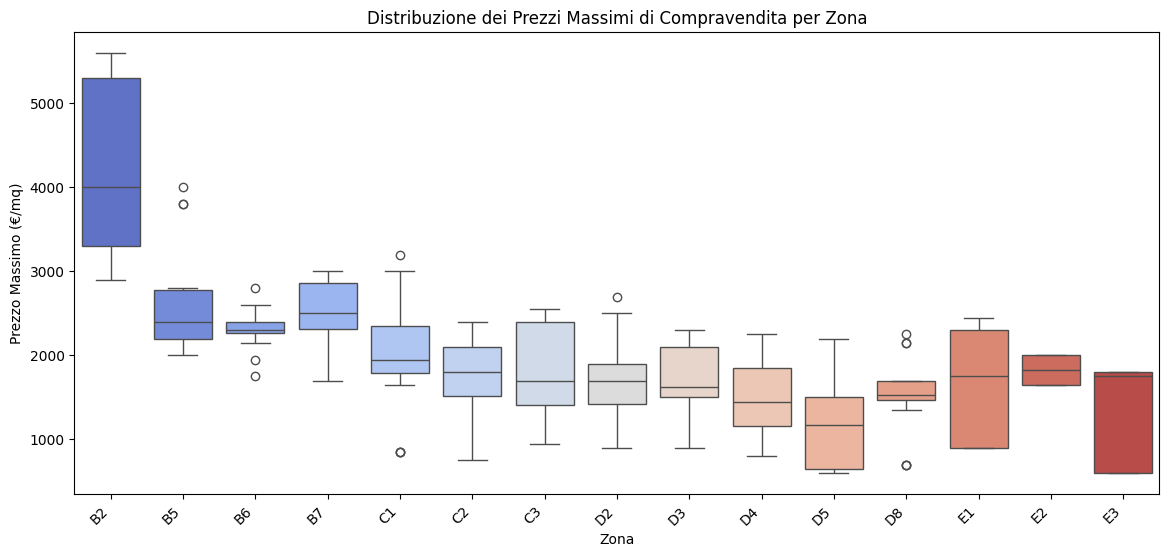

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# üìä 2. DISTRIBUZIONE DEI PREZZI DI COMPRAVENDITA PER ZONA
plt.figure(figsize=(14, 6))
sns.boxplot(x="zona", y="compr_max", data=df_unificato, palette="coolwarm") # Utilizza zona_descr
plt.xticks(rotation=45, ha='right')
plt.title("Distribuzione dei Prezzi Massimi di Compravendita per Zona")
plt.xlabel("Zona")
plt.ylabel("Prezzo Massimo (‚Ç¨/mq)")
plt.show()

ASSE X (ZONA) ogni etichetta rappresenta una zona specifica di Verona

ASSE Y (PREZZO MASSIMO IN EURO AL MQ) indica il prezzo massimo di compravendita degli immobili in quella zona.

OSSERVAZIONI:
- La zona B2 ha i prezzi pi√π alti, con una distribuzione ampia e un prezzo che supera i 5000 euro
- Le zone B5 e B6 hanno prezzi pi√π stabili, intorno ai 2000-2500 euro, i prezzi sono pi√π omogenei
- Le zone C2, C3, D2, D3 hanno prezzi pi√π bassi, intorno ai 1500-2000 euro, la variazione √® inferiore: gli immobili in queste zone hanno prezzi pi√π uniformi
- Zona E1 e E3 hanno distribuzioni pi√π concentrate, E3 ha una mediana pi√π alta rispetto alle altre zone pi√π economiche

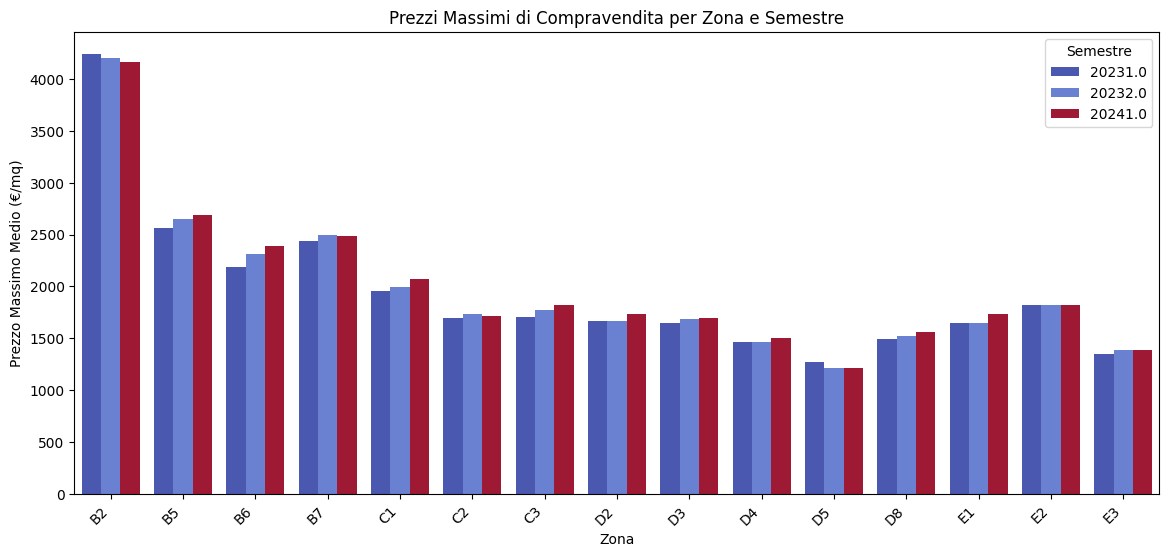

In [15]:
# üìä 3. EVOLUZIONE TEMPORALE DEI PREZZI DI COMPRAVENDITA
df_aggregato = df_unificato.groupby(["zona", "semestre"]).agg({
    "compr_max": "mean",
    "compr_min": "mean",
    "loc_max": "mean",
    "loc_min": "mean"
}).reset_index()

# Creazione del grafico a barre
plt.figure(figsize=(14, 6))
sns.barplot(data=df_aggregato, x="zona", y="compr_max", hue="semestre", palette="coolwarm")
plt.title("Prezzi Massimi di Compravendita per Zona e Semestre")
plt.xlabel("Zona")
plt.ylabel("Prezzo Massimo Medio (‚Ç¨/mq)")
plt.legend(title="Semestre")
plt.xticks(rotation=45, ha='right')
plt.show()

Questo grafico rappresenta l'evoluzione dei prezzi massimi di compravendita per zona in diversi semestri. Questo confronto ci permette quindi di osservare come i prezzi  variano nel tempo per ciascuna zona.

ASSE X (ZONA): Mostra le diverse zone immobiliari del comune di Verona

ASSE Y (Prezzo Massimo Medio in Euro al mq): Indica il prezzo medio massimo di compravendita per quella zona

Il blu scuro rappresenta il primo semestre del 203, l'azzurro il secondo semestre del 2023 e il rosso il primo semestre del 2024.

OSSERVAZIONI:
- B2 ha prezzi pi√π alti, sta calando leggermente nel 2024, questo potrebbe indicare un primo calo di prezzi in questa zona dopo un periodo di crescita.
- B5, B6 e B7 hanno una crescita costante, ogni semestre mostra un leggero aumento dei prezzi rispetto al precedente. Questo suggerisce una domanda costante in queste zone (zone potenzialmente buone per un investimento immobiliare)
- C2, D2, D3 e D4 hanno prezzi pi√π bassi e pressocch√® stabili, i prezzi variano poco rispetto ai semestri, potrebbero essere zone meno soggette a speculazioni o movimenti di mercato.
- Alcune zone mostrano un leggero aumento di prezzo nel 2024, questo suggerisce un possibile incremento della domanda o un aumento del valore dell'immobile.
- D2 e C2 sono zone pi√π stabili che potrebbero essere adatte a chi cerca immobili a lungo termine senza forti oscillazioni di prezzo.
- Se l'obiettivo √® investire in un'area di crescita le zone con prezzi in aumento come B5 e C1 sono ottime candidate.

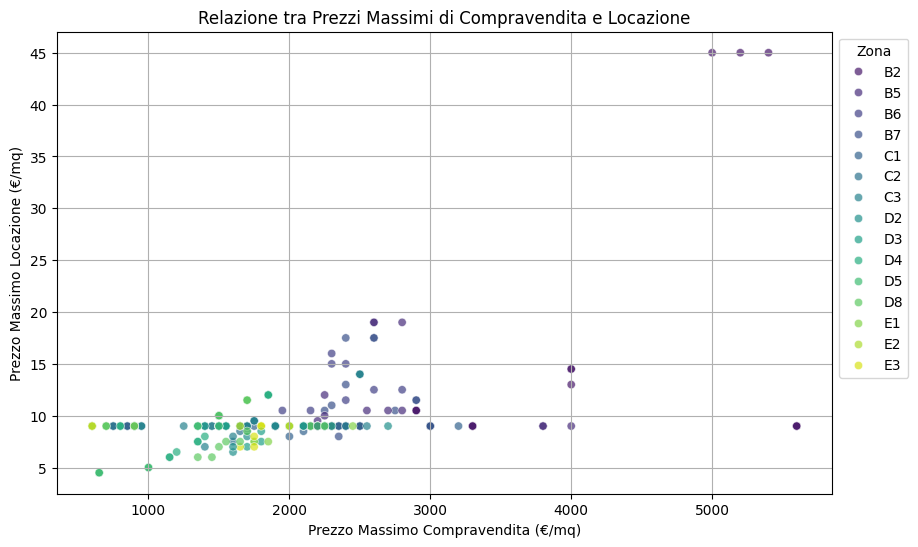

In [16]:
# üìä 4. RELAZIONE TRA PREZZI DI COMPRAVENDITA E LOCAZIONE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_unificato, x="compr_max", y="loc_max", hue="zona", alpha=0.7, palette="viridis")
plt.title("Relazione tra Prezzi Massimi di Compravendita e Locazione")
plt.xlabel("Prezzo Massimo Compravendita (‚Ç¨/mq)")
plt.ylabel("Prezzo Massimo Locazione (‚Ç¨/mq)")
plt.legend(title="Zona", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Questo grafico a dispersione mostra la relazione tra i prezzi massimi di compravendita e i prezzi massimi di locazione nelle diverse zone di Verona.

ASSE X (Prezzo Massimo di Compravendita in euro al mq): indica il pprezzo massimo a cui un immobile √® stato venduto in ciascuna zona

ASSE Y (Prezzo Massimo di Locazione in euro al mq): indica il massimo prezzo di affitto giornaliero(?) per gli immobili in quella zona.

Ogni punto rappresenta un immobile e ogni colore rappresenta una zona.

OSSERVAZIONI: 
- TENDENZA GENERALE: pi√π alto √® il prezzo di compravendita, pi√π alto √® il prezzo di locazione. La maggior parte dei punti segue una tendenza crescente.
- Immobili con prezzi di compravendita sopra i 4000 euro hanno affitti pi√π variabili. Questo potrebbe dipendere da fattori come tipologia dell'immobile, domande specifiche del mercato o offerte particolari.
- Le zone pi√π economiche hanno affitti pi√π stabili, ci√≤ indica che le zone a basso costo hanno anche un affitto pi√π prevedibile e stabile.
- Alcuni punti nel range pi√π alto di vendita hanno affitti molto bassi (possibili spiegazioni: immobili di lusso che vengono venduti ma non affittati a prezzi elevati, differenti tipologie di contratti di locazione, offerte temporanee o immobili con domanda pi√π bassa per l'affitto)

Nella maggior parte dei casi, se un immobile √® pi√π costoso da acquistare, sar√† anche pi√π costoso da affittare.
Tuttavia, ci sono alcune eccezioni in cui gli affitti sono relativamente bassi rispetto ai prezzi di vendita, specialmente nelle fasce di prezzo pi√π alte.
Se si cerca un investimento per affittare, le zone con una correlazione pi√π forte tra vendita e affitto potrebbero offrire rendimenti pi√π prevedibili.
Se invece si vuole comprare per rivendere, potrebbe essere interessante analizzare gli immobili che hanno prezzi di vendita alti ma affitti pi√π bassi, per capire il perch√©.

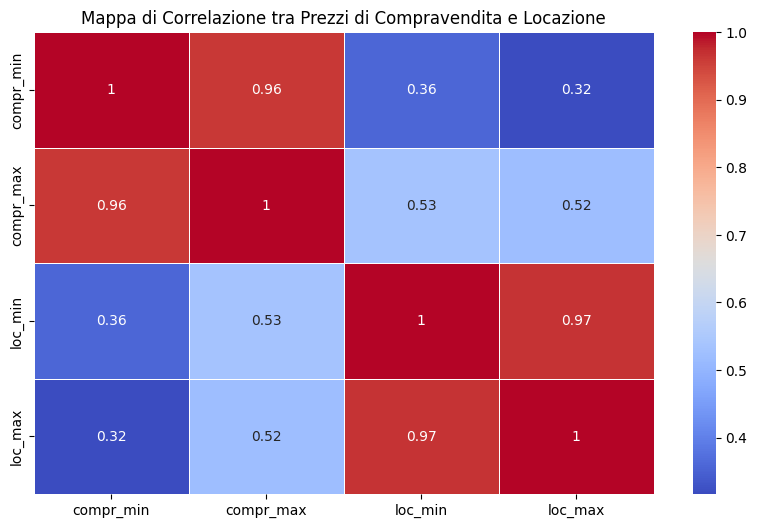

In [17]:
# üìä 5. HEATMAP DI CORRELAZIONE TRA PREZZI
plt.figure(figsize=(10, 6))
sns.heatmap(df_unificato[["compr_min", "compr_max", "loc_min", "loc_max"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mappa di Correlazione tra Prezzi di Compravendita e Locazione")
plt.show()

Questo grafico mostra il grado di relazione tra i prezzi di compravendita e locazione degli immobili.
Le variabili analizzate sono: 
- compr_min: indica il prezzo minimo di compravendita al mq
- compr_max: indica il prezzo massimo di compravendita al mq
- loc_min: indica il prezzo minimo di locazione al mq
- loc_max: prezzo massimo di locazione al mq

Il ROSSO indica una forte correlazione positiva (due variabili aumentano insieme), il BLU indica una bassa o quasi nulla correlazione (le variabili non sono collegate)

OSSERVAZIONI:
- Forte correlazione tra prezzi minimi e massimi di compravendita (0.96): questo significa che quando il prezzo minimo di vendita aumenta, anche il prezzo massimo aumenta.
- Forte correlazione tra prezzi minimi e massimi di locazione (0.97): anche per gli affitti, se il prezzo minimo aumenta allora anche il prezzo massimo.
- Moderata correlazione tra compravendita e locazione (0.32-0.53): se i prezzi di vendita aumentano, gli affitti tendono ad aumentare ma non in maniera perfettamente proporzionale.
--> I prezzi di affitto sono influenzati da altri fattori oltre al valore di vendita.

Cosa significa per un investitore?
Se l‚Äôobiettivo √® acquistare per affittare, non sempre un immobile pi√π costoso porter√† a un affitto pi√π alto.
Potrebbe essere utile valutare zone con alta domanda di locazione, non solo quelle con prezzi di vendita in crescita.

C:\Users\emmal\AppData\Local\Temp\ipykernel_16320\3441930920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="descr_tipologia", y="compr_max", data=df_unificato, palette="magma")


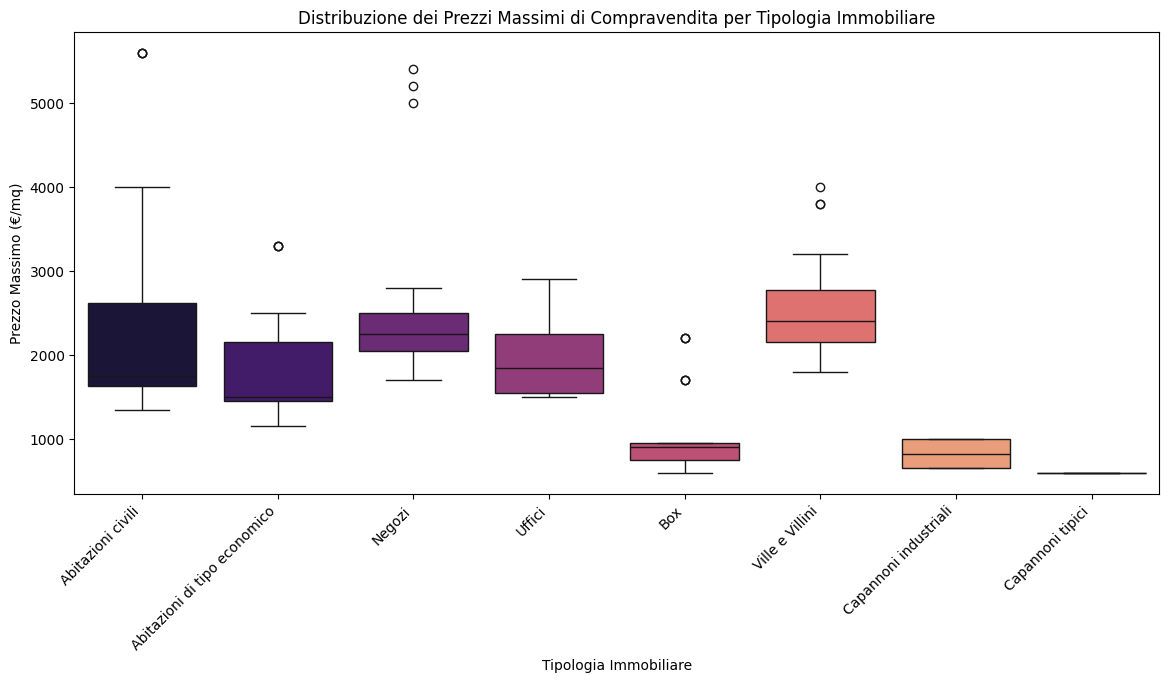

In [18]:
# üìä 6. DISTRIBUZIONE PREZZI PER TIPOLOGIA IMMOBILIARE
plt.figure(figsize=(14, 6))
sns.boxplot(x="descr_tipologia", y="compr_max", data=df_unificato, palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title("Distribuzione dei Prezzi Massimi di Compravendita per Tipologia Immobiliare")
plt.xlabel("Tipologia Immobiliare")
plt.ylabel("Prezzo Massimo (‚Ç¨/mq)")
plt.show()

Questo boxplot mostra la variazione dei prezzi massimi di compravendita in base alla tipologia immobiliare.

ASSE X (TIPOLOGIA IMMOBILIARE): rappresenta le diverse categorie di immobili
ASSE Y (PREZZO MASSIMO IN EURO AL MQ): indica il prezzo massimo di compravendita per ciascuna tipologia.

OSSERVAZIONI:
- Le ville e i villini hanno prezzi pi√π elevati e variabili. Presentano una mediana alta ma anche una grande varibilit√† di prezzo. Alcuni immobili di lusso possono distorcere la distribuzione.
- Le abitazioni civili mostrano una distribuzione ampia.
- Le abitazioni di tipo economico hanno prezzi pi√π bassi e stabili, la mediana √® inferiore rispetto alle abitazioni civili. C'√® meno variabilit√†, questi immobili hanno un prezzo pi√π prevedibile.
- Negozi e Uffici hanno distribuzioni simili ma prezzi diversi. I negozi hanno prezzi leggermente pi√π alti rispetto agli uffici (entrambi presentano outlier, il valore degli immobili pu√≤ variare rispetto alla posizione)
- I Garage (Box) hanno prezzi molto bassi e poco variabili, la distribuzione √® molto ristretta indicando che i garage hannno prezzi abbastanza stabili.
- I capannoni industriali e tipici hanno prezzi pi√π bassi e una distribuzione uniforme, hanno prezzi bassi e con poca variabilit√†. Il valore di questi immobili √® meno oggetto a speculazione.

Se si sta cercando un immobile di lusso, le ville e villini sono quelli con il valore pi√π alto e la maggiore variabilit√†.
Le abitazioni civili sono l‚Äôopzione pi√π equilibrata, con prezzi variabili ma non estremi.
Le abitazioni di tipo economico hanno prezzi pi√π bassi e prevedibili, adatte a chi cerca un investimento sicuro.
Se si investe in negozi o uffici, la posizione diventa determinante, visto che il prezzo massimo varia molto.
I garage e i capannoni industriali hanno prezzi pi√π stabili, con meno fluttuazioni di mercato.

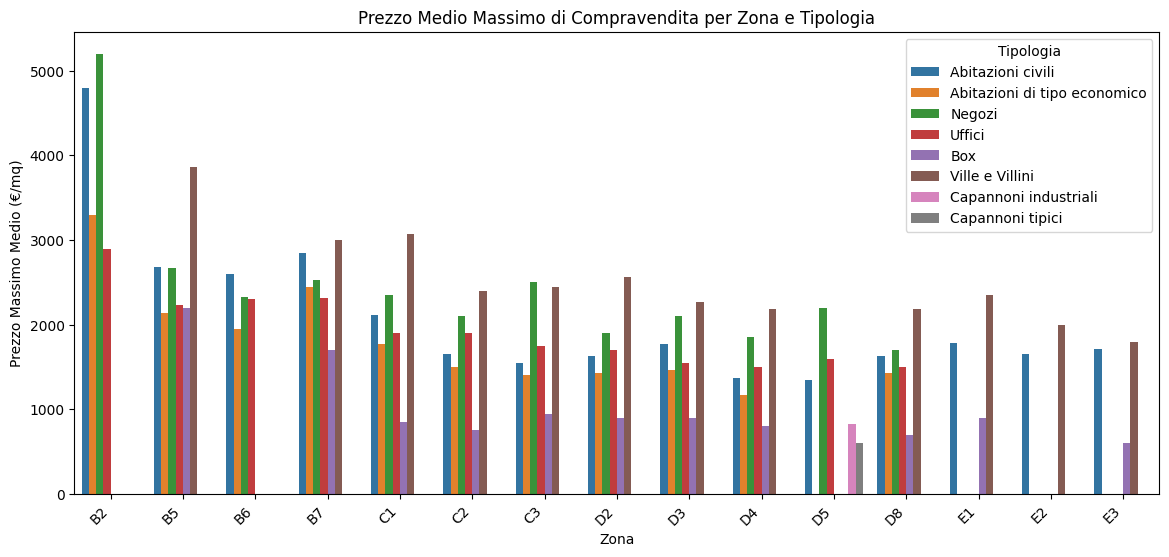

In [19]:
# Calcolo dei prezzi medi per zona e tipologia
df_prezzi_tipologia = df_unificato.groupby(["zona", "descr_tipologia"]).agg({
    "compr_max": "mean"
}).reset_index()

# Grafico a barre raggruppate
plt.figure(figsize=(14, 6))
sns.barplot(data=df_prezzi_tipologia, x="zona", y="compr_max", hue="descr_tipologia", palette="tab10")
plt.title("Prezzo Medio Massimo di Compravendita per Zona e Tipologia")
plt.xlabel("Zona")
plt.ylabel("Prezzo Massimo Medio (‚Ç¨/mq)")
plt.legend(title="Tipologia")
plt.xticks(rotation=45, ha='right')
plt.show()


Questo grafico a barre mostra il prezzo medio massimo di compravendita per ciascuna zona di Verona, suddiviso per tipologia immobiliare.

ASSE X(ZONA): rappresenta le varie zone di Verona. Ogni colore rappresenta una tipologia immobiliare.

ASSE Y(PREZZO MASSIMO MEDIO IN EURO AL MQ): indica il prezzo massimo medio per ciascuna tipologia di immobile in una determinata zona.

OSSERVAZIONI:
- Ville e Villini dominano in quasi tutte le zone, hanno il prezzo medio pi√π alto in ogni zona. Sono particolarmente costose in B2, B5, B7, C1. Suggerendo quartieri pi√π residenziali o di lusso.
- I negozi hanno prezzi molto elevati in alcune zone (B2, B5 e B7) indicando una forte domanda per spazi commerciali in queste zone. In altre zone, i prezzi sono pi√π equilibrati rispetto alle altre tipologie immobiliari.
- Le abitazioni civili (blu) sono tra le pi√π costanti e con prezzi moderati, distribuzione uniforme tra le zone. Fascia di prezzo tra i 1500 e i 3000 euro al mq.
- Gli uffici seguono un pattern simile ai negozi ma con costi pi√π contenuti. 
- I box hanno prezzi bassi e costanti
- I capannnoni industriali e tipici sono tra i meno costosi. Le zone industriali sono pi√π economiche rispetto alle zone residenziali e/o commerciali.

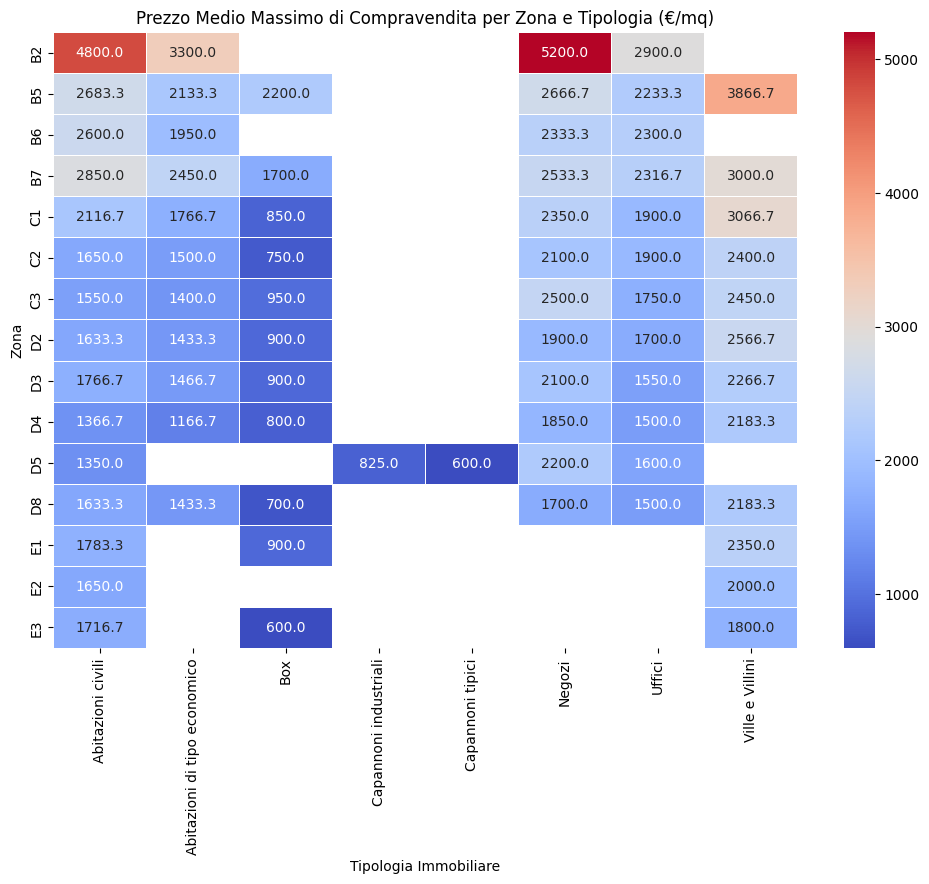

In [20]:
# Creazione di una tabella pivot per la heatmap
pivot_heatmap = df_unificato.pivot_table(
    index="zona", 
    columns="descr_tipologia", 
    values="compr_max", 
    aggfunc="mean"
)

# Grafico Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_heatmap, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Prezzo Medio Massimo di Compravendita per Zona e Tipologia (‚Ç¨/mq)")
plt.xlabel("Tipologia Immobiliare")
plt.ylabel("Zona")
plt.show()


Questo grafico mostra i prezzi medi massimi in euro al mq di compravendita per zona e tipologia immobiliare.

ASSE Y (Zona): Mostra le diverse zone immobiliari di Verona.

ASSE X (Tipologia Immobiliare): Include le diverse tipologie di immobili (Abitazioni civili, Negozi, Uffici, Ville e Villini, ecc.).

Colori:
- Rosso: prezzi pi√π alti
- Blu: prezzi pi√π bassi

OSSERVAZIONI:
- Le Ville e Villini sono gli immobili pi√π costosi in tutte le zone, ci√≤ indica che queste zone hanno la maggiore domanda per immobili di lusso.
- Le Abitazioni civili hanno prezzi pi√π equilibrati 
- Le Abitazioni di tipo economico sono pi√π economiche e uniformi. 
- I Negozi hanno prezzi elevati in alcune zone specifiche. In altre zone i prezzi sono pi√π moderati, indicando che la domanda commerciale √® fortemente legata alla posizione.
- I Box, i Capannoni Industriali e Tipici sono gli immobili meno costosi. 

Se l‚Äôobiettivo √® investire in immobili di lusso, le ville e villini nelle zone B2, B5, B7 e C1 offrono i prezzi pi√π alti, suggerendo una forte domanda.
Se si cerca un investimento residenziale accessibile, le abitazioni di tipo economico nelle zone D2, D3 e D4 potrebbero essere le pi√π convenienti.
Per chi vuole investire in immobili commerciali, i negozi in B2 e B5 hanno i prezzi pi√π elevati, segno di alta richiesta.
Gli uffici hanno prezzi moderati, con un massimo intorno ai 2500‚Ç¨ in C3 e D2.
Per chi cerca investimenti pi√π sicuri e meno volatili, i box e i capannoni industriali hanno prezzi bassi e costanti, indicando un mercato stabile.

## Test del modello